### Plotting with Plotls.jl

* [GitHub Repository](https://github.com/JuliaPlots/Plots.jl)
* [Documentation](https://juliaplots.github.io)

## Imports

In [1]:
using Plots
using StatPlots
using DataFrames, RDatasets

plotlyjs()

Plots.PlotlyJSBackend()

# Basics

## Simple line scatter

* Define x, y vectors 
* Invoke plot() with x, y as regular inputs

In [2]:
function linescatter()
    x=1:4
    y=[10, 15, 13, 17]
    plot(x, y)
end
linescatter()

### Customize and add multiple traces to one plot

* Multiple approaches
    * Plot each trace at a time, and plot on top using plot!()
    * Could also pass inputs as vectors and matrices

In [3]:
function multiple_scatter_traces()
    x=1:4
    y1 = [10, 15, 13, 17]
    y2 = [16, 5, 11, 9]
    y3 = [12, 9, 15, 12]
    y4 = [5, 10, 8, 12]
    plot(y1, line = (:scatter, 1), label="marker")
    plot!(y2, marker =(:circle, 4), label="line+marker")
    plot!(y3, label="line")
    plot!(y4, line = (:dash, 2), label="dash")
end
multiple_scatter_traces()



### Multiple traces can also be plotted as a matrix
If the argument is a "matrix-type", then each column will map to a series, cycling through columns if there are fewer columns than series. In this sense, a vector is treated just like an "nx1 matrix".


### Challenge! Make the markers work!

In [4]:
function multiple_scatter_traces_v2()
    x=1:4
    y1 = [10, 15, 13, 17]
    y2 = [16, 5, 11, 9]
    y3 = [12, 9, 15, 12]
    y4 = [5, 10, 8, 12]
    y = [y1, y2, y3, y4]
    plot(y, line=(2, [:solid :solid :dash :dash]))
end
multiple_scatter_traces_v2()

### Adding data labels
* Pass the array of labels as `series_annotations`

In [5]:
function data_labels()
    x = 1:5
    y1 = [1, 6, 3, 6, 1]
    y2 = [4, 1, 7, 1, 4]

    plot(y1, line = (:scatter, 1), 
         series_annotations=[text("A-1", :bottom, 12, :blue, "Raleway, sans-serif"),
                             "A-2","A-3","A-4","A-5"], 
         label="Team A",
         title="Data Labels on the plot")
    plot!(y2, line = (:scatter, 1), 
         series_annotations=[text("B-1", :top, 12, :red, "Times"),
                                  "B-2","B-3","B-4","B-5"], 
         label="Team B")
end
data_labels()

### Area

* How tomake it fill only to next y?

In [6]:
# pyplot() -- to fill to one
function area1()
    y1=[0, 2, 3, 5] #, fill="tozeroy")
    y2=[3, 5, 1, 7] #, fill="tonexty")
    plot(y1, label="lines", w=3, fill=0, α=1)
    plot!(y2, label="lines", w=3, fill=0, α=0.6)
end
area1()

## Other visual interpratations of matrix data?


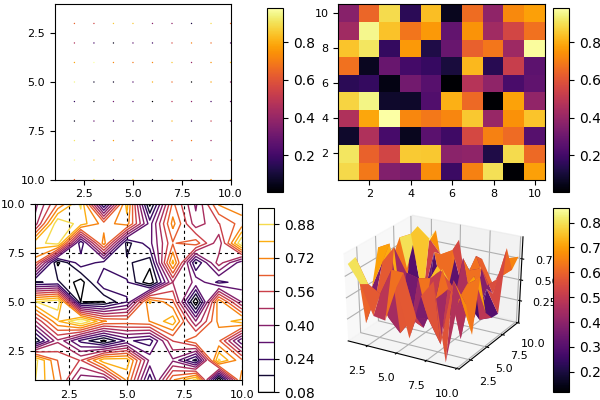

In [7]:
function plot_matrices()
    pyplot()
    z = rand(10,10)
    plot(spy(z), heatmap(z), contour(z), surface(z))
end
plot_matrices()

## Advanced Layouts


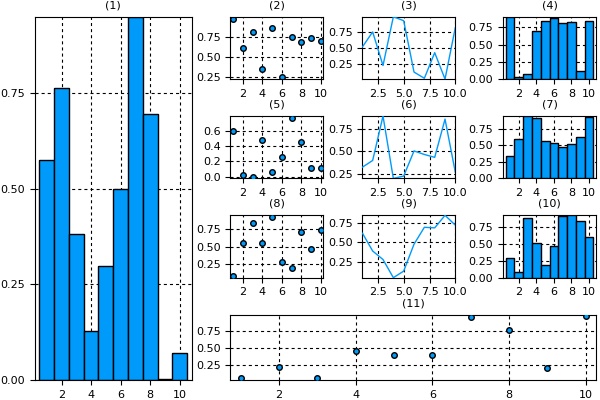

In [8]:
function advanced_layouts()
    l = @layout [  a{0.3w} [grid(3,3)
                             b{0.2h} ]]
    plot(
        rand(10,11),
        layout = l, legend = false, seriestype = [:bar :scatter :path],
        title = reshape(["($i)" for i=1:11], 1, 11), titleloc = :center, titlefont = font(8)
    )
end
advanced_layouts()

## Basic Plots for Statistical Analysis

In [9]:
plotlyjs()
function grouped_bar_example()
    x=["giraffes", "orangutans", "monkeys"]
    y1=[20, 14, 23]
    y2=[12, 18, 29]

    bar(x, y1, label= "SF Zoo")
    bar!(x, y2, label= "LA Zoo")
end
grouped_bar_example()

#### Challenge: Stacking vertical (bar_position) doesn't seem to be supported (only overlay) and it doesn't work for all backends


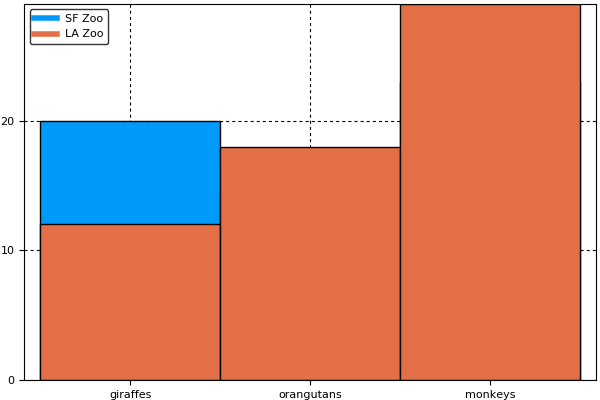

In [10]:
pyplot()
function stacked_bar_example()
    x=["giraffes", "orangutans", "monkeys"]
    y1=[20, 14, 23]
    y2=[12, 18, 29]

    bar(x, y1, bar_position=:stack, label= "SF Zoo")
    bar!(x, y2, bar_position=:stack, label= "LA Zoo")
end
stacked_bar_example()


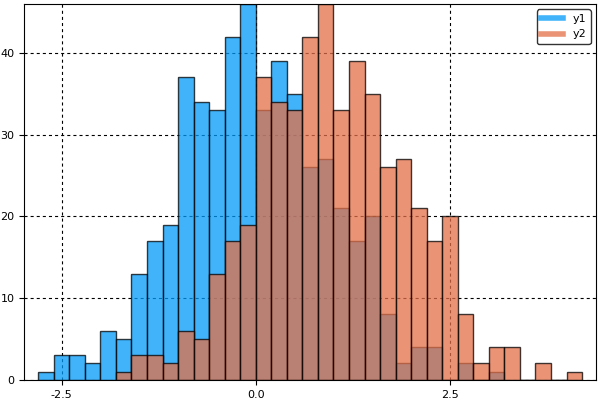

In [11]:
function two_hists()
    x0 = randn(500)
    x1 = x0+1

    histogram(x0, opacity=0.75)
    histogram!(x1, opacity=0.75)
end

two_hists()

### BoxPlot 

#### Challenge: How to group by day without overlapping?


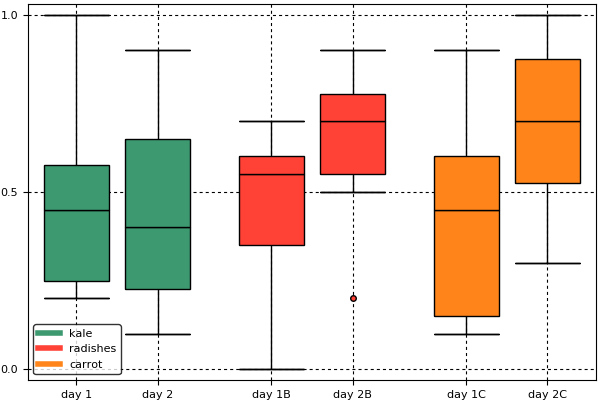

In [12]:
function box_plot()
    x1 = ["day 1", "day 1", "day 1", "day 1", "day 1", "day 1",
          "day 2", "day 2", "day 2", "day 2", "day 2", "day 2"]
    x2 = ["day 1B", "day 1B", "day 1B", "day 1B", "day 1B", "day 1B",
          "day 2B", "day 2B", "day 2B", "day 2B", "day 2B", "day 2B"]
    x3 = ["day 1C", "day 1C", "day 1C", "day 1C", "day 1C", "day 1C",
      "day 2C", "day 2C", "day 2C", "day 2C", "day 2C", "day 2C"]
    
    y1=[0.2, 0.2, 0.6, 1.0, 0.5, 0.4, 0.2, 0.7, 0.9, 0.1, 0.5, 0.3]
    y2=[0.6, 0.7, 0.3, 0.6, 0.0, 0.5, 0.7, 0.9, 0.5, 0.8, 0.7, 0.2]
    y3=[0.1, 0.3, 0.1, 0.9, 0.6, 0.6, 0.9, 1.0, 0.3, 0.6, 0.8, 0.5]
    
    boxplot(x1, y1, label="kale", color="#3D9970")
    boxplot!(x2, y2, label="radishes", color="#FF4136")
    boxplot!(x3, y3, label="carrot", color="#FF851B")
#     
end
box_plot()



### Plotting DataFrames:


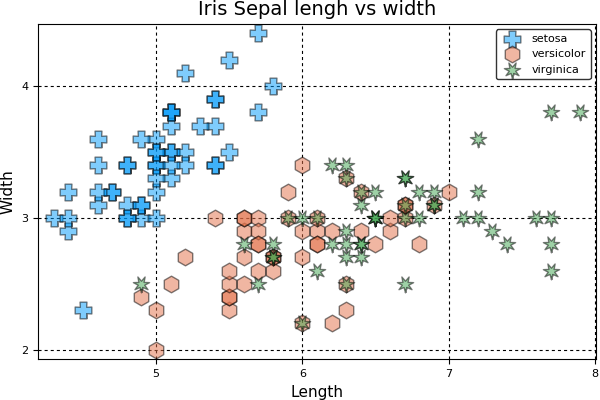

In [19]:

function dataframe_scatter()
    iris = dataset("datasets", "iris");
#     display(head(iris));
    scatter(iris, :SepalLength, :SepalWidth, group=:Species,
        title = "Iris Sepal lengh vs width",
        xlabel = "Length", ylabel = "Width",
        m=(0.5, [:cross :hex :star7], 12))
end
dataframe_scatter()